In [1]:
import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

In [2]:
# Acquire, load, and preview the data.
data = pd.read_csv('https://tf-curricula-prod.s3.amazonaws.com/data-science/Advertising.csv')
display(data.head())

# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = data['Sales'].values.reshape(-1, 1)
X = data[['TV','Radio','Newspaper']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.100,37.800,69.200,22.100
1,2,44.500,39.300,45.100,10.400
2,3,17.200,45.900,69.300,9.300
3,4,151.500,41.300,58.500,18.500
4,5,180.800,10.800,58.400,12.900



Coefficients: 
 [[ 0.04576465  0.18853002 -0.00103749]]

Intercept: 
 [2.93888937]

R-squared:
0.8972106381789521


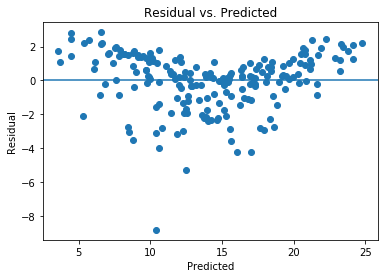

In [3]:
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = data['Sales']

# Calculate the error, also called the residual.
residual = actual - predicted


plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

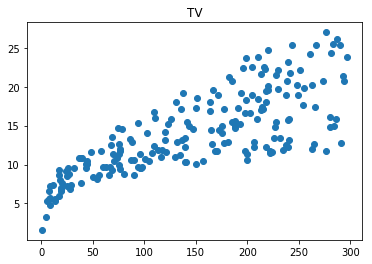

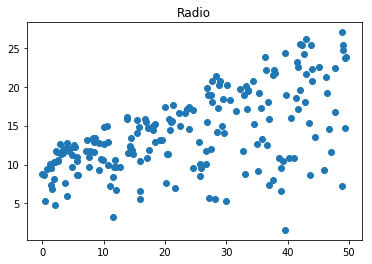

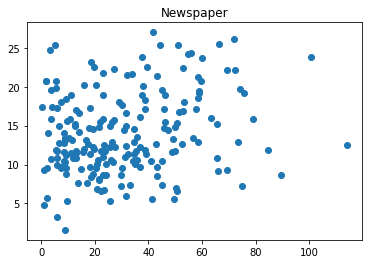

In [4]:
plt.scatter(data['TV'], data['Sales'])
plt.title('TV')
plt.show()

plt.scatter(data['Radio'], data['Sales'])
plt.title('Radio')
plt.show()

plt.scatter(data['Newspaper'], data['Sales'])
plt.title('Newspaper')
plt.show()

In [15]:
data['exp_TV'] = [math.exp(x) for x in  data['TV']]
data['exp_Radio'] = [math.exp(x) for x in  data['Radio']]
data['exp_Newspaper'] = [math.exp(x) for x in  data['Newspaper']]

In [16]:
exp_X = data[['exp_TV','exp_Radio','exp_Newspaper']]

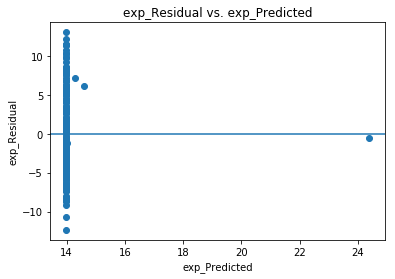

In [17]:
regr.fit(exp_X, Y)

exp_predicted = regr.predict(exp_X).ravel()
actual = data['Sales']

# Calculate the error, also called the residual.
exp_residual = actual - exp_predicted


plt.scatter(exp_predicted, exp_residual)
plt.xlabel('exp_Predicted')
plt.ylabel('exp_Residual')
plt.axhline(y=0)
plt.title('exp_Residual vs. exp_Predicted')
plt.show()

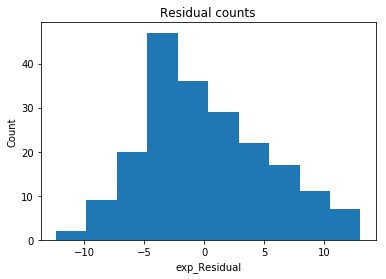

In [18]:
plt.hist(exp_residual)
plt.title('Residual counts')
plt.xlabel('exp_Residual')
plt.ylabel('Count')
plt.show()

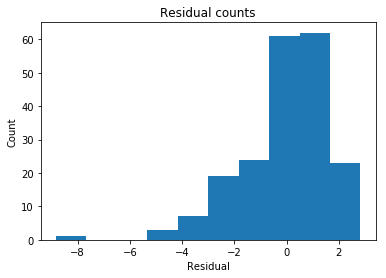

In [19]:
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()